In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('c:/users/wston/documents/python/pybuild/tsla.csv')
print(df.head())

         Date      Open      High       Low     Close  Adj Close     Volume
0  2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
1  2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
2  2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
3  2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500
4  2010-07-07  1.093333  1.108667  0.998667  1.053333   1.053333  103825500


In [3]:
df.shape

(3182, 7)

In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3.182000e+03
mean,59.901157,61.264962,58.415129,59.871511,59.871511,9.462344e+07
std,95.761415,97.986461,93.275299,95.656826,95.656826,8.196880e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,9.318500,9.508667,9.019667,9.250834,9.250834,4.265625e+07
50%,16.357667,16.565001,16.102334,16.342666,16.342666,7.635285e+07
75%,25.894832,27.090166,25.351500,26.754500,26.754500,1.191272e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3182 non-null   object 
 1   Open       3182 non-null   float64
 2   High       3182 non-null   float64
 3   Low        3182 non-null   float64
 4   Close      3182 non-null   float64
 5   Adj Close  3182 non-null   float64
 6   Volume     3182 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 174.1+ KB


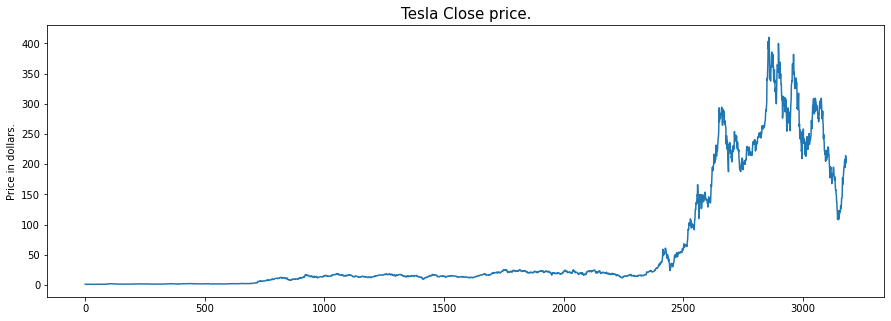

In [6]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
1,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
3,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
4,2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500


In [8]:
df[df['Close'] == df['Adj Close']].shape

(3182, 7)

In [9]:
df = df.drop(['Adj Close'], axis=1)

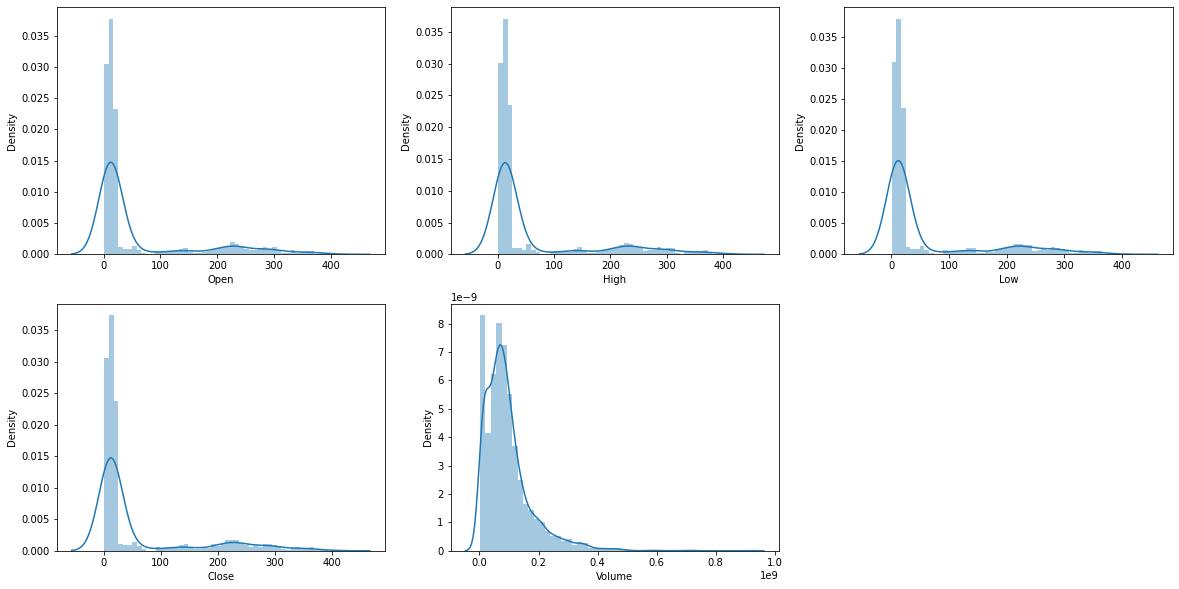

In [10]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
 
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

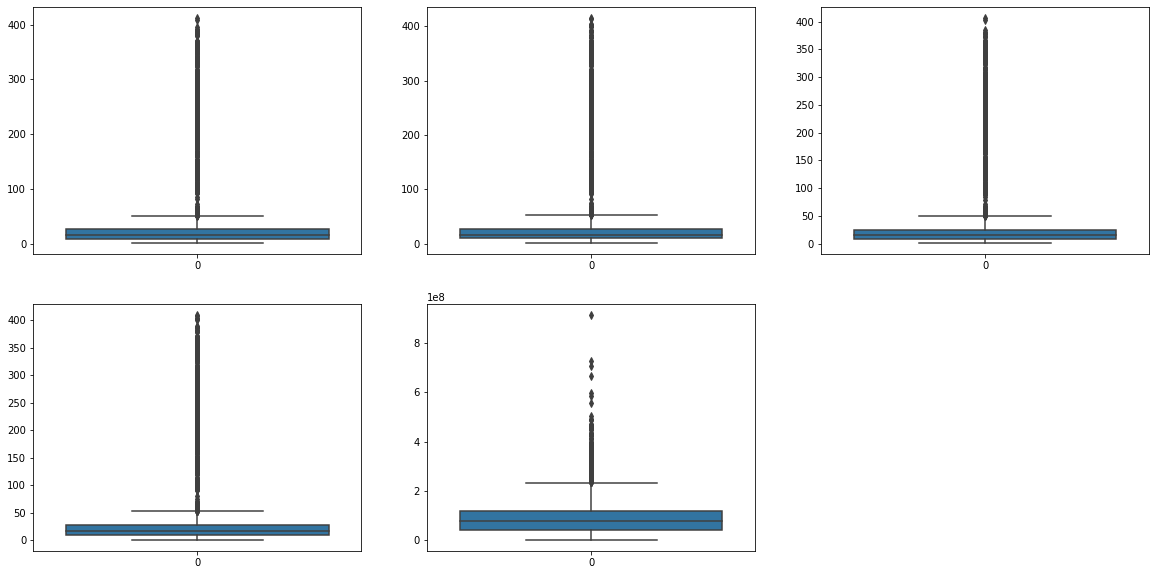

In [11]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

In [12]:
splitted = df['Date'].str.split('-', expand=True)
 
df['day'] = splitted[1].astype('int')
df['month'] = splitted[0].astype('int')
df['year'] = splitted[2].astype('int')
 
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year
0,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,6,2010,30
1,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,7,2010,1
2,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,7,2010,2
3,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,7,2010,6
4,2010-07-07,1.093333,1.108667,0.998667,1.053333,103825500,7,2010,7


In [13]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,6,2010,30,1
1,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,7,2010,1,1
2,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,7,2010,2,1
3,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,7,2010,6,1
4,2010-07-07,1.093333,1.108667,0.998667,1.053333,103825500,7,2010,7,1


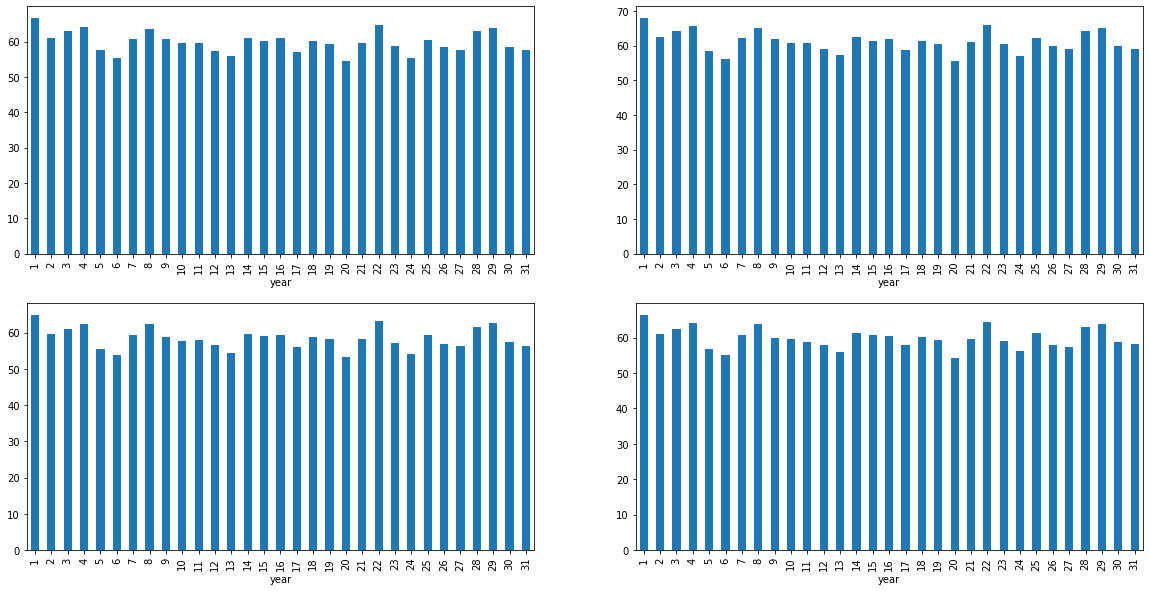

In [14]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [15]:
df.groupby('is_quarter_end').mean()

,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,
0,55.833765,57.077361,54.550487,55.914342,9.415193e+07,6.458944,2016.117302,15.719941
1,67.226758,68.807068,65.375566,66.998596,9.547265e+07,6.880282,2016.644366,15.697183


In [16]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

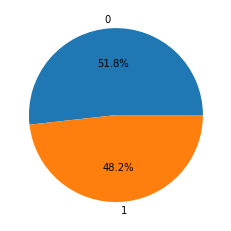

In [17]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

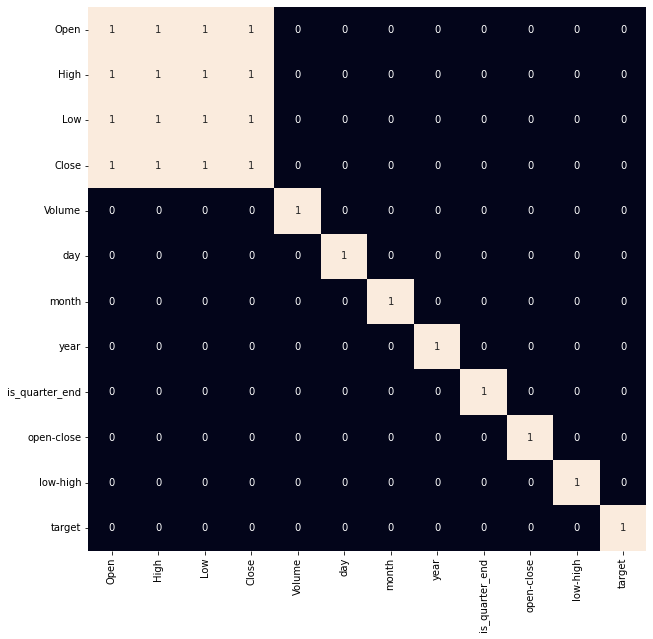

In [18]:
plt.figure(figsize=(10, 10))
 
# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [19]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']
 
scaler = StandardScaler()
features = scaler.fit_transform(features)
 
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(2863, 3) (319, 3)


In [20]:
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]
 
for i in range(3):
  models[i].fit(X_train, Y_train)
 
  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5210375571582496
Validation Accuracy :  0.44176102620951774

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5002234556649308
Validation Accuracy :  0.506215852403199

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 
Training Accura

In [21]:
metrics.plot_confusion_matrix(models[0], X_valid, Y_valid)
plt.show()

AttributeError: module 'sklearn.metrics' has no attribute 'plot_confusion_matrix'